In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
url = 'https://worldtable.info/gosudarstvo/tablica-rozhdaemosti-po-godam-rossija.html'
response = requests.get(url, verify=False)
html = response.text

soup = BeautifulSoup(html, 'html.parser')
table = soup.find('table')

/Users/raufvaleev/mambaforge/lib/python3.9/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'worldtable.info'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


In [3]:
df = pd.read_html(str(table))[0]

df.columns = df.iloc[0, :]
df = df.loc[1:, :]

df['Количество родившихся чел.'] = df['Количество родившихся чел.'].apply(lambda x: int(x.replace(' ', '')))

In [4]:
df.head()

,Год,Количество родившихся чел.
1,1959,2796228
2,1960,2782353
3,1961,2662135
4,1962,2482539
5,1963,2331505


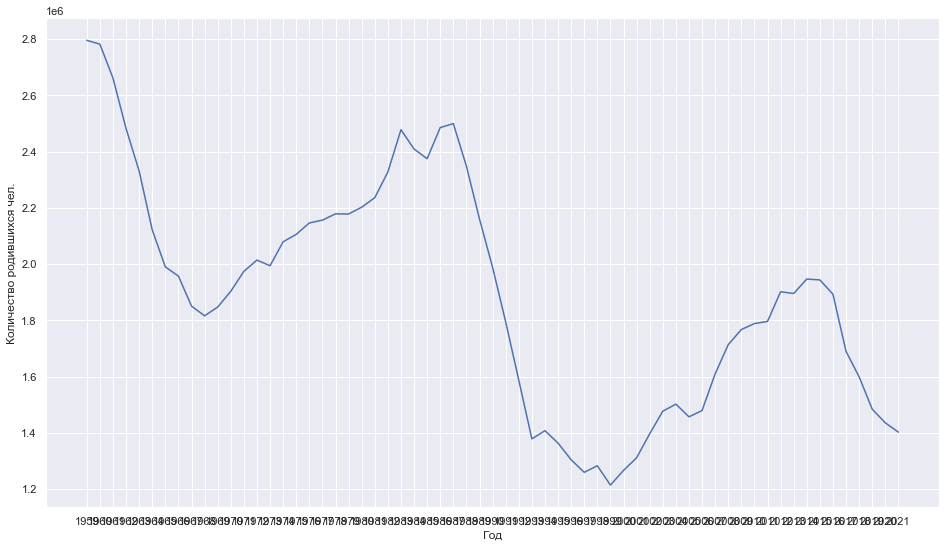

In [5]:
sns.set_theme()
plt.figure(figsize=(16, 9))
sns.lineplot(data=df, x='Год', y='Количество родившихся чел.')
plt.show()